# Clustering hiérarchique sur un petit groupe de joueurs

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy
import math
import random
import numbers
import functions
import functions.clustering as cl
import functions.labeled_set as ls
import functions.decision_tree as dtree


from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
players_att = pd.read_csv("soccer/playerattributes.csv")
players_att[0:5]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
players = pd.read_csv("soccer/player.csv")
players[0:5]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
players_name = ["Manuel Neuer", "Gianluigi Buffon", "Iker Casillas",
                "Daniel Alves", "David Luiz", "Gerard Pique", "Sergio Ramos",
                "David Silva", "Andres Iniesta", "Xavi Hernandez", "Luka Modric",
                "Cristiano Ronaldo", "Lionel Messi", "Neymar"]
#print(len(players_name))
players_select = players.loc[players.player_name.isin(players_name)]

players_id = list(players_select["player_api_id"])
players_id
id_name = dict()
    
for i in range(len(players_select)):
    id_name[players_select.player_api_id.iloc[i]] = players_select.player_name.iloc[i]
    
players_select[0:5]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
739,742,30955,Andres Iniesta,41,1984-05-11 00:00:00,170.18,150
1992,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
2090,2093,33988,Daniel Alves,146530,1983-05-06 00:00:00,172.72,154
2378,2381,52133,David Luiz,179944,1987-04-22 00:00:00,187.96,185
2410,2413,37459,David Silva,168542,1986-01-08 00:00:00,170.18,148


In [5]:
df_players_att = players_att.loc[players_att.player_api_id.isin(players_id)]
df_players_att[0:5]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
12773,12774,41,30955,2015-10-16 00:00:00,88.0,88.0,right,high,medium,79.0,...,92.0,71.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12774,12775,41,30955,2015-09-21 00:00:00,88.0,88.0,right,high,medium,79.0,...,92.0,71.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12775,12776,41,30955,2014-11-07 00:00:00,89.0,89.0,right,high,medium,85.0,...,93.0,71.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12776,12777,41,30955,2014-10-17 00:00:00,89.0,89.0,right,high,medium,85.0,...,93.0,71.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12777,12778,41,30955,2014-09-18 00:00:00,89.0,89.0,right,high,medium,85.0,...,93.0,71.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0


In [6]:
def create_df_player_attributes(dataframe):
    """permet de creer un nouveau dataframe, en ne 
    gardant que la ligne la plus récente pour chaque joueur"""
    new_df = dict()
    for column in dataframe.columns:
        new_df[column] = []
    
    players_id = set()
    players_id_list = []
    for i in range(len(dataframe)):
        player = dataframe.iloc[i]
        
        if not player[1] in players_id:
            players_id.add(player[1])
            players_id_list.append(player[2])
            for j in range(len(player)):
                if dataframe.columns[j] == "preferred_foot":
                    if player[j] == "left":
                        new_df[dataframe.columns[j]].append(0)
                    else:
                        new_df[dataframe.columns[j]].append(1)
                elif dataframe.columns[j] in {"attacking_work_rate","defensive_work_rate"}:
                    if player[j] == "low":
                        new_df[dataframe.columns[j]].append(0)
                    elif player[j] == "medium":
                        new_df[dataframe.columns[j]].append(0.5)
                    else:
                        new_df[dataframe.columns[j]].append(1)
                else:
                    new_df[dataframe.columns[j]].append(player[j])
    return (pd.DataFrame(new_df),players_id_list)
            

In [7]:
df, players_id_list = create_df_player_attributes(df_players_att)
df2 = df.drop(["date", "player_api_id", "player_fifa_api_id", "id"],axis=1)
df2[0:5]

,acceleration,aggression,agility,attacking_work_rate,balance,ball_control,crossing,curve,defensive_work_rate,dribbling,...,reactions,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys
0,76.0,58.0,83.0,1.0,87.0,92.0,79.0,80.0,0.5,90.0,...,88.0,92.0,65.0,56.0,75.0,64.0,57.0,59.0,92.0,74.0
1,91.0,62.0,90.0,1.0,62.0,91.0,82.0,88.0,0.0,93.0,...,92.0,81.0,94.0,23.0,93.0,90.0,31.0,79.0,81.0,87.0
2,84.0,85.0,85.0,1.0,82.0,85.0,80.0,77.0,0.0,81.0,...,82.0,80.0,87.0,86.0,89.0,78.0,83.0,57.0,67.0,68.0
3,72.0,84.0,74.0,1.0,56.0,79.0,68.0,70.0,0.5,70.0,...,79.0,78.0,74.0,84.0,73.0,71.0,85.0,77.0,68.0,67.0
4,79.0,51.0,93.0,1.0,88.0,91.0,85.0,83.0,0.0,87.0,...,84.0,92.0,71.0,29.0,68.0,68.0,30.0,56.0,93.0,80.0


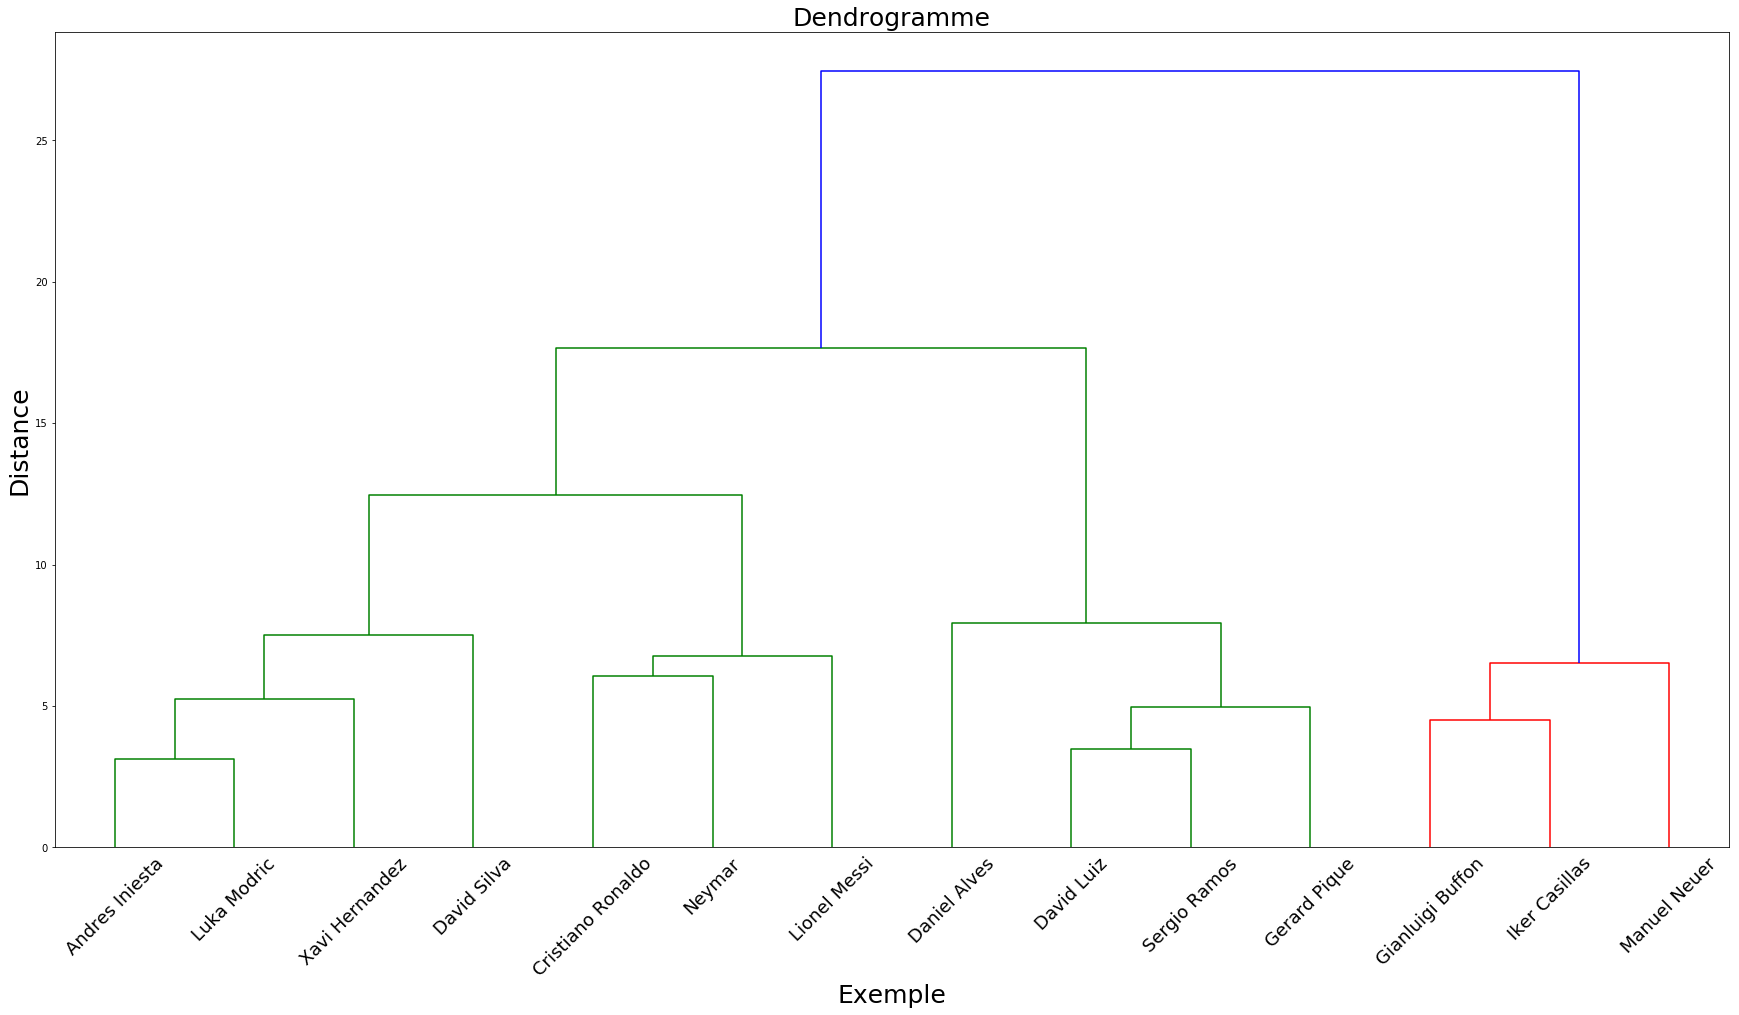

In [8]:
df_norm = cl.normalisation(df2)
names = [id_name[players_id_list[i]] for i in range(len(players_id_list))]
M_fusion = cl.clustering_hierarchique_max2(df_norm.as_matrix(),"manhattan",names)

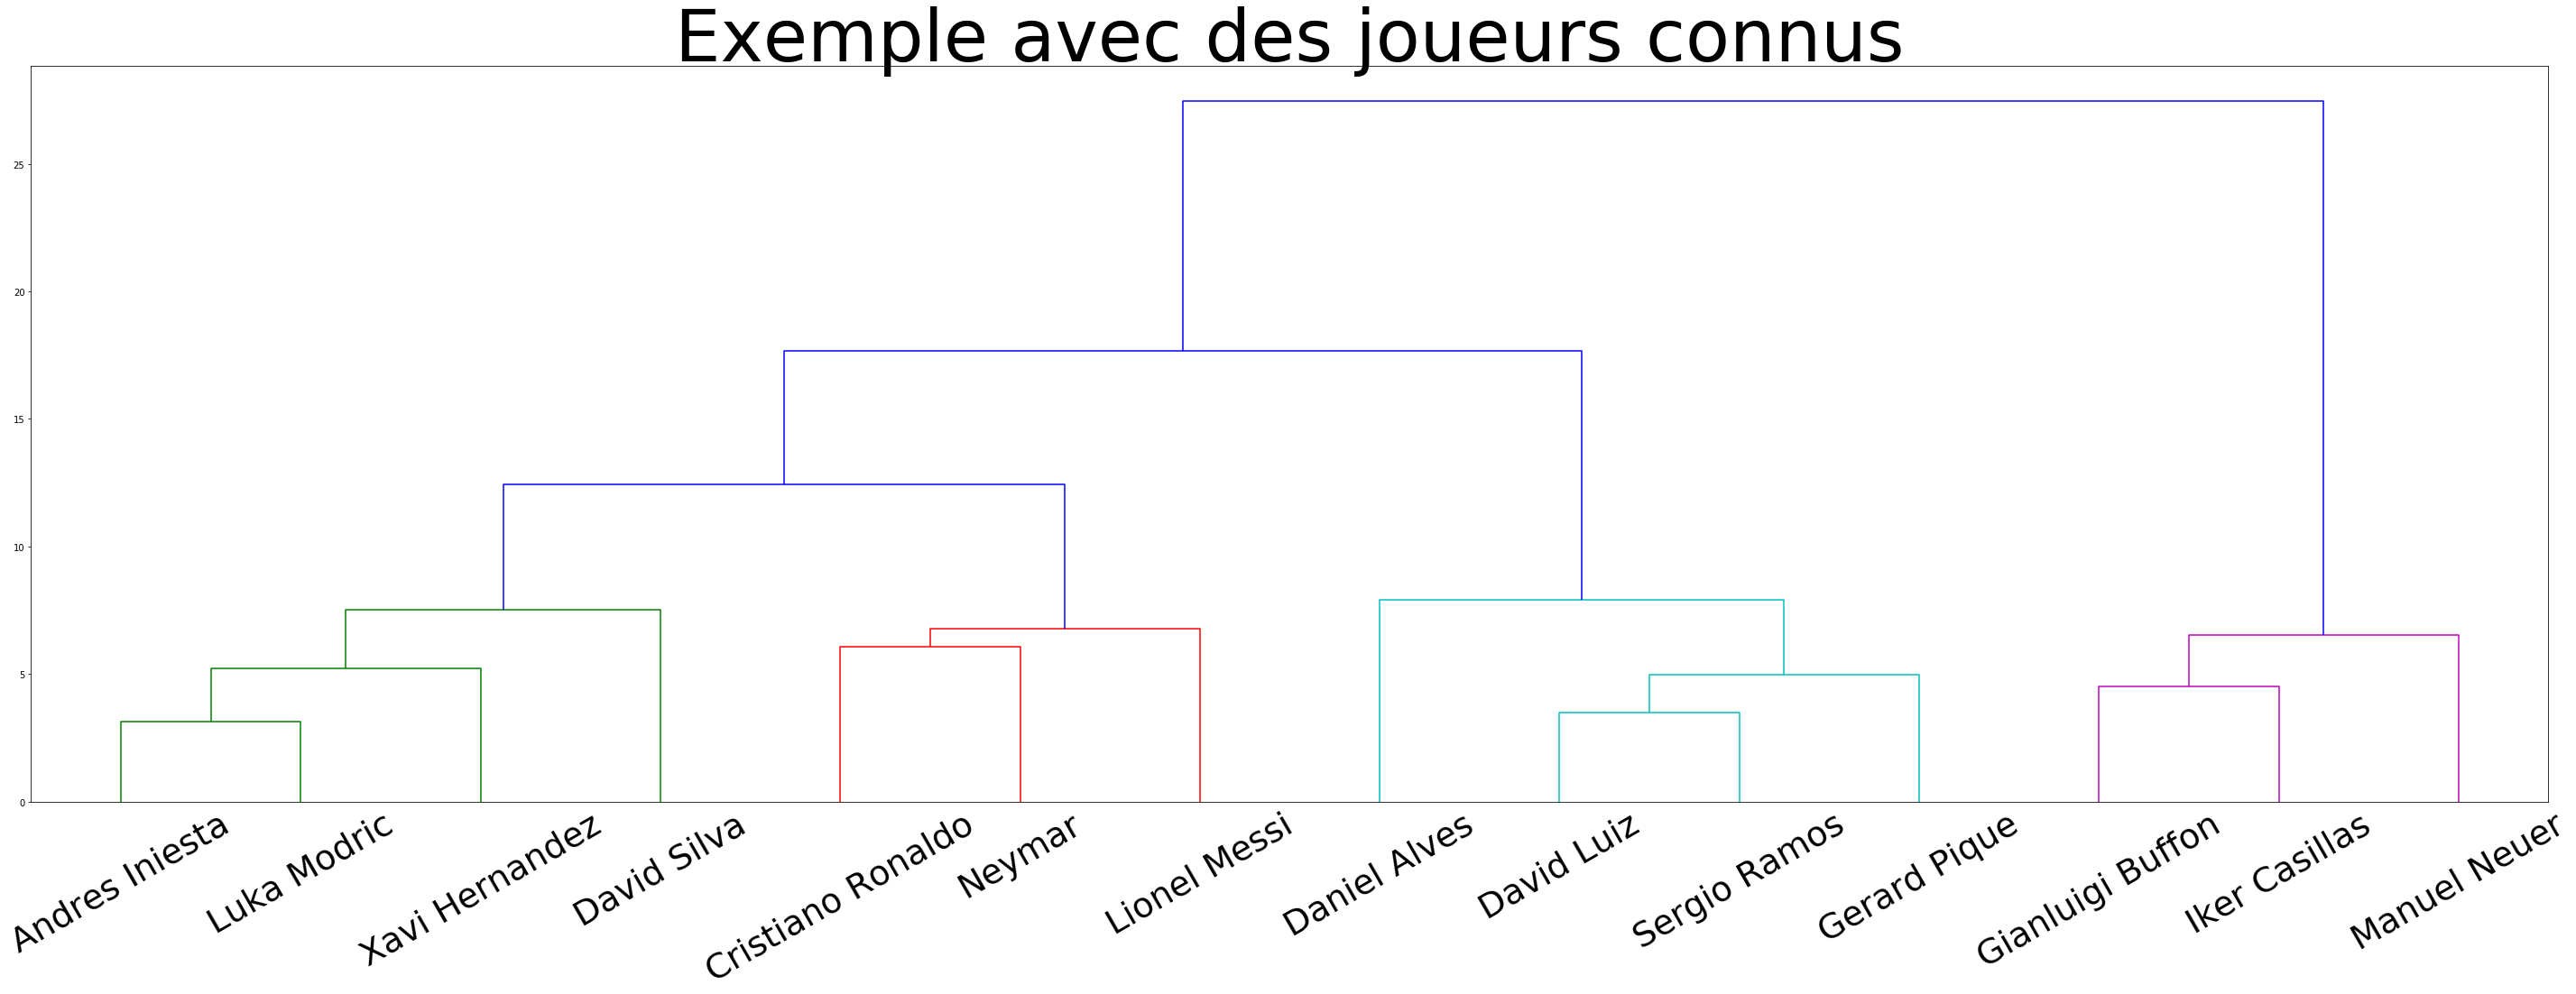

In [16]:
plt.figure(figsize = (50,15))
plt.title("Exemple avec des joueurs connus", fontsize = 80)

scipy.cluster.hierarchy.dendrogram(M_fusion, color_threshold= 10,labels=names, leaf_font_size=38, leaf_rotation=30)
plt.show()